# Import necessary packages

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from sklearn.preprocessing import LabelEncoder, StandardScaler, FunctionTransformer
from sklearn.pipeline import make_pipeline

plt.style.use('default')

# Load single cell data

In [37]:
data = pd.read_csv("temporal_data_ready_normalized.csv", index_col=0)
data = data.dropna(axis=0)

columns = data.columns

genes = np.array([name.split("_")[0] for name in list(data.index)])
cells = np.array(["_".join(name.split("_")[1:]) for name in list(data.index)])

enc_genes = LabelEncoder()
enc_cells = LabelEncoder()

enc_genes.fit(genes)
enc_cells.fit(cells)

X = data.values[:, np.newaxis, :]
y_genes = enc_genes.transform(genes)
y_cells = enc_cells.transform(cells)

X.shape, y_genes.shape, y_cells.shape, genes.shape, cells.shape

((22000, 1, 6), (22000,), (22000,), (22000,), (22000,))

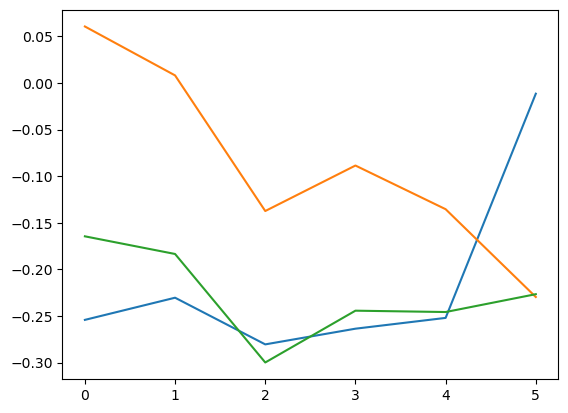

In [39]:
plt.plot(X[0, 0])
plt.plot(X[1, 0])
plt.plot(X[2, 0])
plt.show()

<Axes: ylabel='Count'>

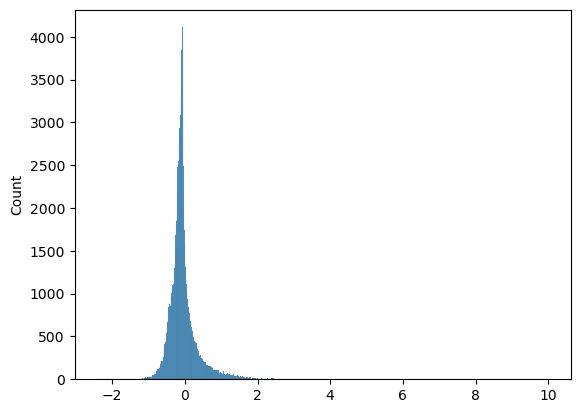

In [40]:
sns.histplot(X.ravel())

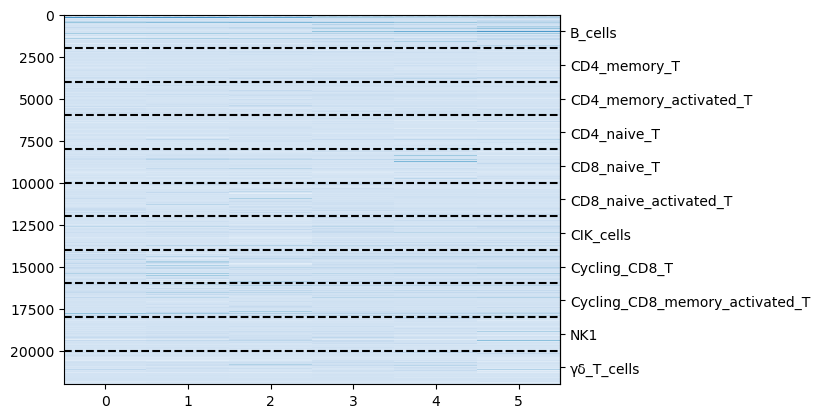

In [42]:
plt.imshow(X[:, 0][np.argsort(cells)], cmap="Blues", aspect="auto", interpolation='none')

secax = plt.gca().secondary_yaxis('right')  # Adds a secondary x-axis at the top
secax.set_yticks(np.arange(0, len(cells), 2000)+1000)  # Set ticks every 2000
secax.set_yticklabels(cells[np.argsort(cells)][::2000])

for i in range(0, len(cells), 2000):
    plt.axhline(y=i, color='k', linestyle='--')

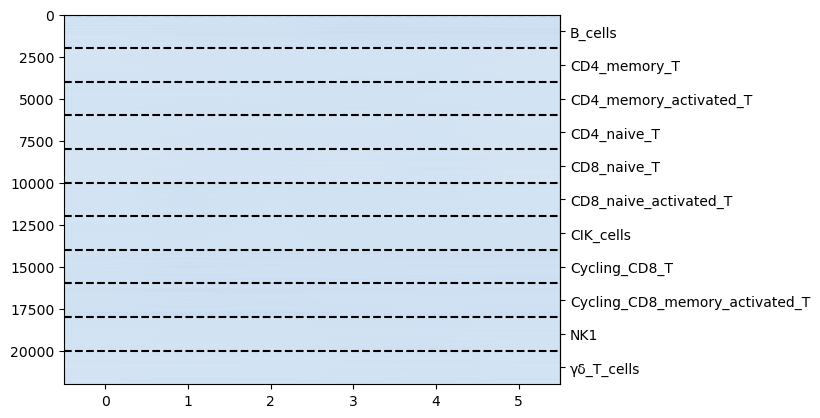

In [33]:
plt.imshow(X[:, 0][np.argsort(cells)], cmap="Blues", aspect="auto",)

# plt.axhline(y=i, color='k', linestyle='--')
secax = plt.gca().secondary_yaxis('right')  # Adds a secondary x-axis at the top
secax.set_yticks(np.arange(0, len(cells), 2000)+1000)  # Set ticks every 2000
secax.set_yticklabels(cells[np.argsort(cells)][::2000])

for i in range(0, len(cells), 2000):
    plt.axhline(y=i, color='k', linestyle='--')

## PCA on the original data

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components=2, random_state=0)

In [7]:
X_pca = pca.fit_transform(X[:, 0])

<Axes: >

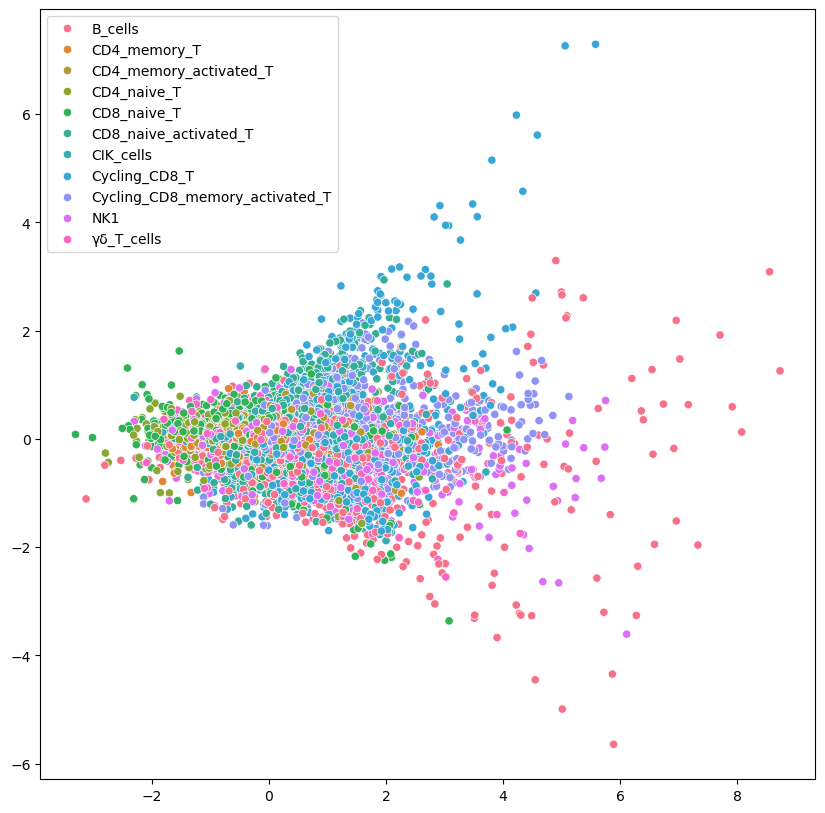

In [8]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cells)

## Shapelets

In [9]:
from aeon.transformations.collection.shapelet_based import RandomDilatedShapeletTransform

In [10]:
trf = RandomDilatedShapeletTransform(shapelet_lengths=[2,4], max_shapelets=100, n_jobs=-2)

In [11]:
%%time
X_transformed = trf.fit_transform(X)

CPU times: user 459 ms, sys: 97.5 ms, total: 557 ms
Wall time: 385 ms


In [12]:
X_transformed_sorted = X_transformed[np.argsort(cells)]
X_transformed_sorted = X_transformed_sorted[:, np.argsort(X_transformed[np.argsort(cells)].mean(axis=0).ravel())[::-1]]
X_transformed_sorted.shape

(22000, 300)

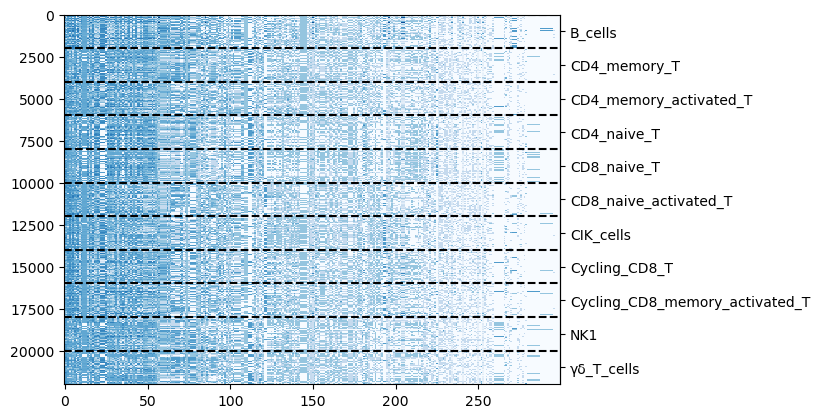

In [13]:
plt.imshow(np.log1p(X_transformed_sorted), cmap="Blues", aspect="auto", interpolation='none')

# plt.axhline(y=i, color='k', linestyle='--')
secax = plt.gca().secondary_yaxis('right')  # Adds a secondary x-axis at the top
secax.set_yticks(np.arange(0, len(cells), 2000)+1000)  # Set ticks every 2000
secax.set_yticklabels(cells[np.argsort(cells)][::2000])

for i in range(0, len(cells), 2000):
    plt.axhline(y=i, color='k', linestyle='--')

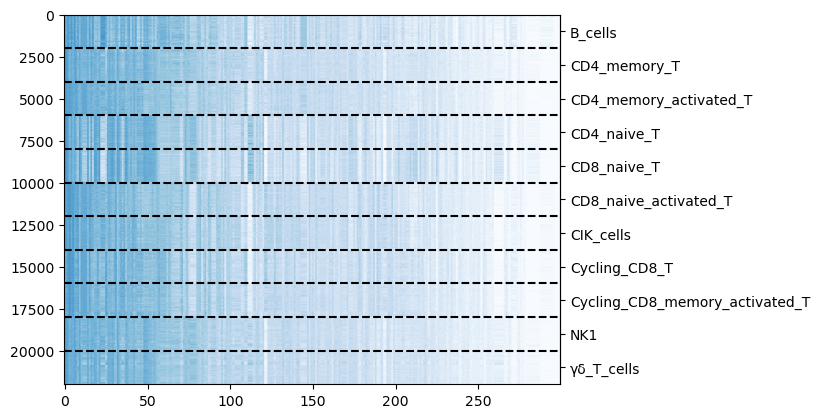

In [14]:
plt.imshow(np.log1p(X_transformed_sorted), cmap="Blues", aspect="auto")

# plt.axhline(y=i, color='k', linestyle='--')
secax = plt.gca().secondary_yaxis('right')  # Adds a secondary x-axis at the top
secax.set_yticks(np.arange(0, len(cells), 2000)+1000)  # Set ticks every 2000
secax.set_yticklabels(cells[np.argsort(cells)][::2000])

for i in range(0, len(cells), 2000):
    plt.axhline(y=i, color='k', linestyle='--')

### PCA on the shapelet transformed data

In [15]:
pca = PCA(n_components=2, random_state=0)

In [16]:
X_pca = pca.fit_transform(X_transformed)

<Axes: >

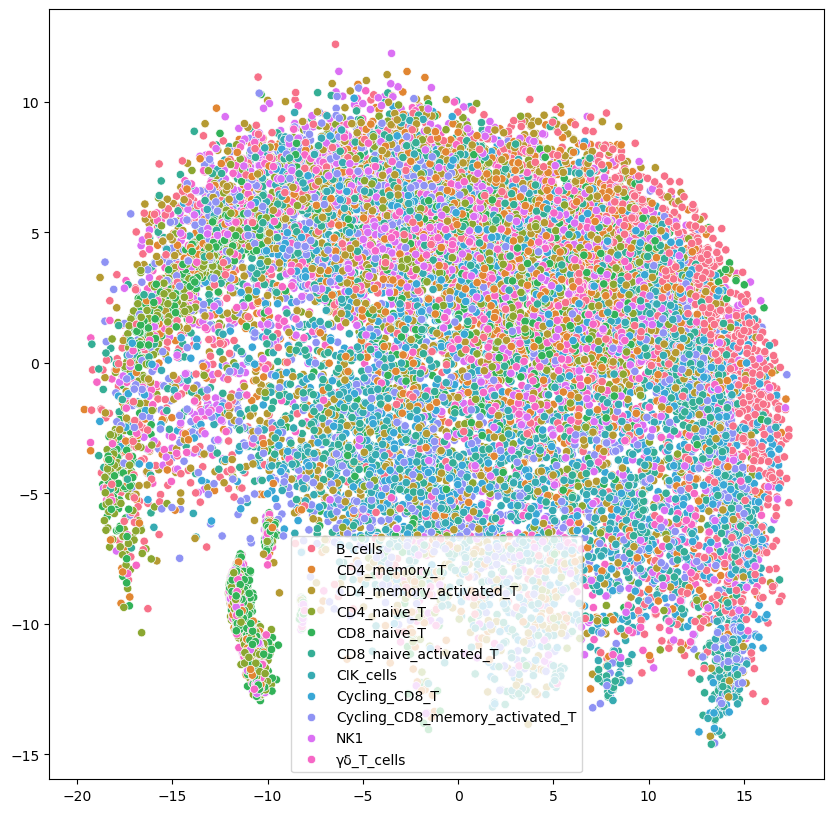

In [17]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cells)

## BORF

In [18]:
from aeon.transformations.collection.dictionary_based import BORF

In [19]:
trf = BORF(n_jobs=-2, window_size_min_window_size=2, alphabets_min_symbols=3, alphabets_max_symbols=4, min_window_to_signal_std_ratio=0.0)

In [20]:
%%time
X_transformed = trf.fit_transform(X)

CPU times: user 29.4 ms, sys: 59.3 ms, total: 88.7 ms
Wall time: 5.32 s


In [21]:
X_transformed_sorted = X_transformed.toarray()[np.argsort(cells)]
X_transformed_sorted = X_transformed_sorted[:, np.argsort(X_transformed.toarray()[np.argsort(cells)].mean(axis=0).ravel())[::-1]]
X_transformed_sorted.shape

(22000, 64)

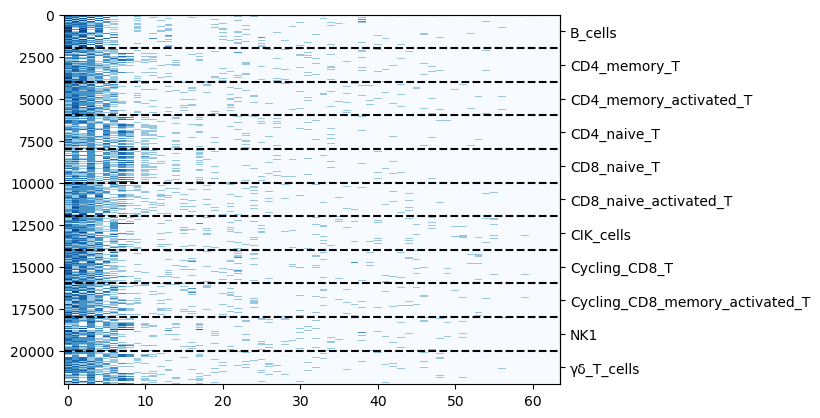

In [22]:
plt.imshow(np.log1p(X_transformed_sorted), cmap="Blues", aspect="auto", interpolation='none')

# plt.axhline(y=i, color='k', linestyle='--')
secax = plt.gca().secondary_yaxis('right')  # Adds a secondary x-axis at the top
secax.set_yticks(np.arange(0, len(cells), 2000)+1000)  # Set ticks every 2000
secax.set_yticklabels(cells[np.argsort(cells)][::2000])

for i in range(0, len(cells), 2000):
    plt.axhline(y=i, color='k', linestyle='--')

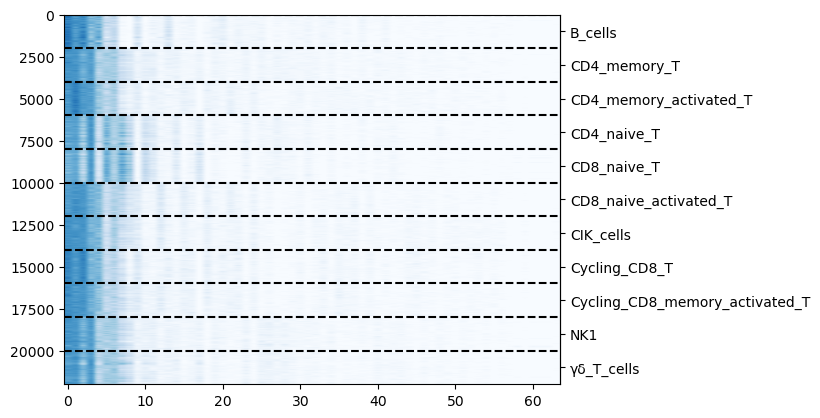

In [23]:
plt.imshow(np.log1p(X_transformed_sorted), cmap="Blues", aspect="auto")

# plt.axhline(y=i, color='k', linestyle='--')
secax = plt.gca().secondary_yaxis('right')  # Adds a secondary x-axis at the top
secax.set_yticks(np.arange(0, len(cells), 2000)+1000)  # Set ticks every 2000
secax.set_yticklabels(cells[np.argsort(cells)][::2000])

for i in range(0, len(cells), 2000):
    plt.axhline(y=i, color='k', linestyle='--')

### PCA on the BORF transformed data

In [24]:
pca = make_pipeline(PCA(n_components=2, random_state=0))

In [25]:
X_pca = pca.fit_transform(X_transformed.toarray())

<Axes: >

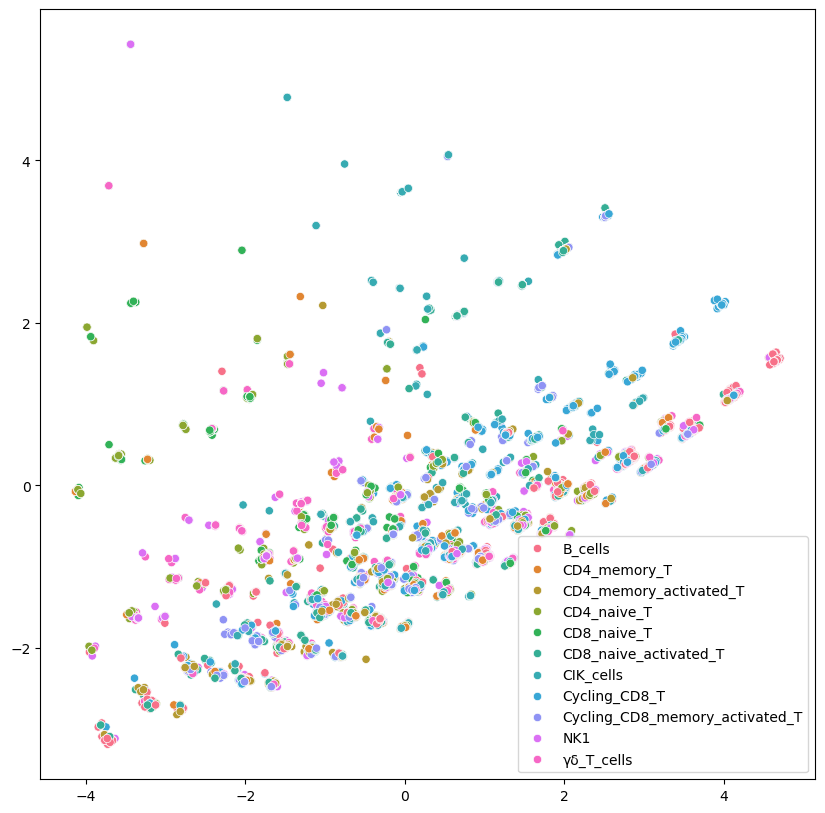

In [26]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cells)